#1. Data Preparation

In [99]:
# Seed value
seed_value = 1

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
seed_value += 1

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
seed_value += 1

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
seed_value += 1

# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

In [100]:
%run ./utils/parseData.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical

In [101]:
def GetData(path="./data/", augment=False):
    all_data = read_data(path)
    
    if augment:
        all_data = AugmentData(all_data)
    
    labels = all_data[:, :1]
    data = all_data[:, 2:]
    
    return labels, data

In [102]:
def AugmentData(data):
    augmented_data = np.array(data)
    for i in range(augmented_data.shape[0]):
        for j in range(7, 72):
            random.seed(i * j)
            random_v = random.random()
            augmented_data[i][j] = augmented_data[i][j] + (-1.0 + (random_v * (1.0 + 1.0)))
    full_data = np.concatenate((data, augmented_data), axis=0)
    return full_data

In [103]:
path = "./data/"
labels, data = GetData(path=path, augment=False)

df = pd.DataFrame(data) # for visualising
df

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,90.0,0.0,90.0,90.0,0.0,90.0,122.989521,5.031775,32.396511,154.947733,...,-67.582787,-125.367848,-72.437172,-50.852973,-96.587422,-79.767570,-67.930081,-70.781021,-70.997175,-87.361629
1,90.0,0.0,90.0,90.0,0.0,90.0,135.335277,22.762292,47.132208,171.382518,...,-102.868148,83.136421,15.529929,90.343455,78.789987,5.173831,90.525847,72.386893,-4.364089,104.625646
2,90.0,0.0,90.0,90.0,0.0,90.0,141.891296,28.615349,54.489470,-178.385441,...,-109.162265,82.213256,36.904574,89.425871,76.610167,22.542002,89.209393,73.080910,-3.183434,110.232384
3,90.0,0.0,90.0,90.0,0.0,90.0,141.153613,28.042486,53.670653,-179.465062,...,-105.087837,83.791429,7.936759,89.145902,79.618323,-2.325866,93.411176,73.203217,-12.320351,108.900585
4,90.0,0.0,90.0,90.0,0.0,90.0,123.134389,5.315064,32.581669,155.111402,...,-66.555146,-124.152353,-72.004125,-51.785051,-94.026793,-73.783497,-70.421552,-73.377815,-68.075547,-86.260239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,90.0,0.0,90.0,90.0,0.0,90.0,136.117148,23.558528,48.020448,172.695000,...,-98.328479,83.881257,8.030162,91.208625,80.051306,-6.781338,95.508604,74.032483,-20.728024,115.463379
268,90.0,0.0,90.0,90.0,0.0,90.0,127.991088,13.598609,38.574855,162.014599,...,-84.058191,-105.174249,-47.854197,-70.212570,-90.002308,-53.102226,-71.775582,-78.800412,-47.744039,-73.490989
269,90.0,0.0,90.0,90.0,0.0,90.0,128.619080,14.520708,39.325698,162.858402,...,-85.925970,-103.907414,-44.440241,-72.821098,-89.280597,-49.272736,-72.529674,-77.843477,-45.906435,-73.415761
270,90.0,0.0,90.0,90.0,0.0,90.0,136.420157,23.859257,48.363773,173.187056,...,-98.127984,84.143438,10.057336,89.546770,79.712891,-3.979332,91.587358,73.134629,-14.307162,108.203424


In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state= 2, stratify=labels)

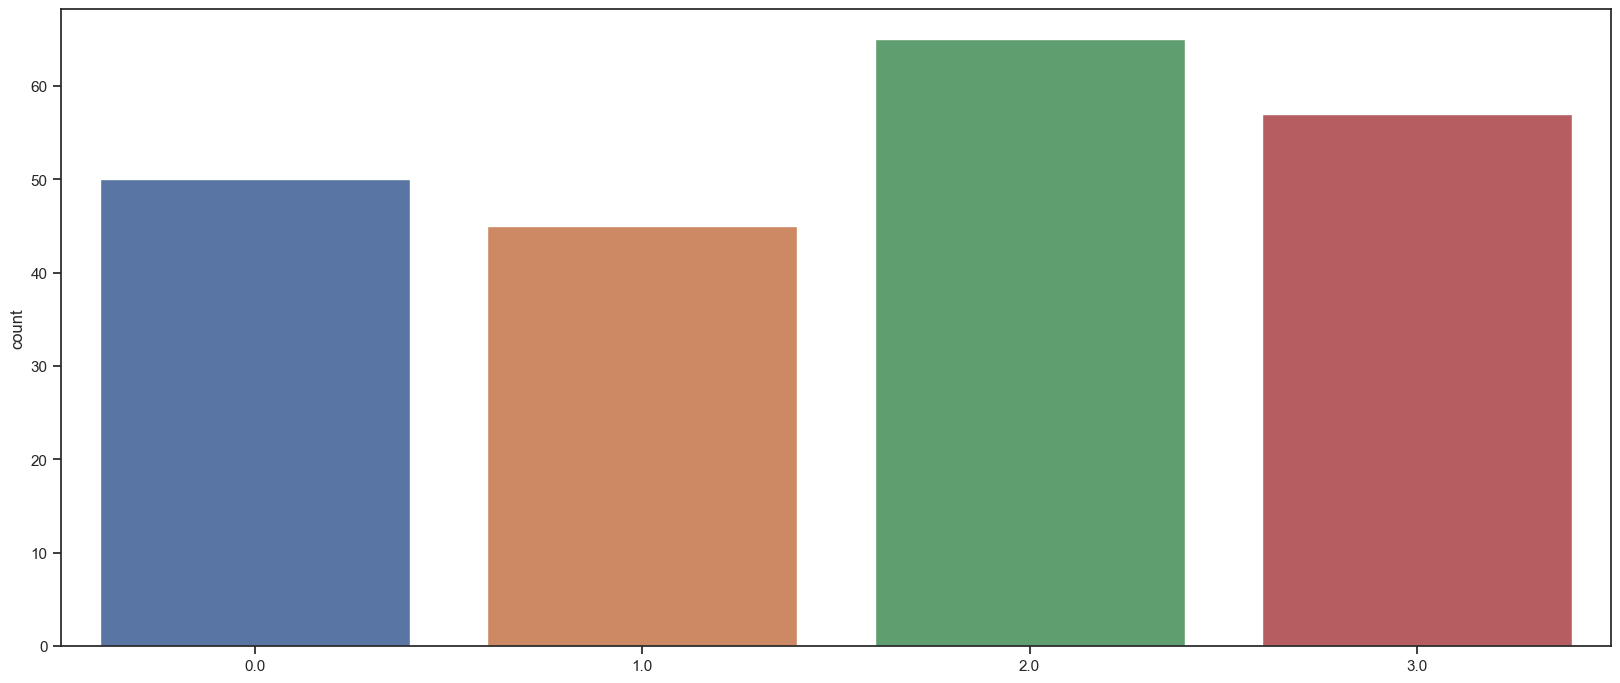

In [105]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set_style("ticks")
_ = sns.countplot(x=y_train.reshape(-1))

In [106]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("")
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (217, 72)
y_train shape: (217, 1)

X_test shape: (55, 72)
y_test shape: (55, 1)


Changing labels shape to categorical: 

In [107]:
y_train[0]

array([2.])

In [108]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [109]:
y_train[0]

array([0., 0., 1., 0.], dtype=float32)

In [110]:
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

y_train shape: (217, 4)
y_test shape: (55, 4)


In [111]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [112]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (217, 72, 1)
X_test shape: (55, 72, 1)


In [113]:
class_mapping = ['thumbs_up','thumbs_down','ok','victory']
num_classes = 4

#2. Creating and training CNN

In [114]:
import keras
from keras import layers  
from keras import models
from keras import callbacks
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [115]:
def create_1D_model():
  model = models.Sequential()

  model.add(layers.Conv1D(32, 3, input_shape=X_train.shape[1:3], activation='relu', ))
  model.add(layers.Conv1D(16, 1, activation='relu', ))
  model.add(layers.Dropout(0.2))
  model.add(layers.MaxPooling1D(pool_size=2))

  model.add(layers.Flatten())

  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(num_classes, activation='softmax'))

  return model

In [116]:
model = create_1D_model()
model.compile(optimizer=keras.optimizers.SGD(),loss='categorical_crossentropy',metrics=['accuracy', 'Precision', 'Recall'])

In [117]:
MCP = keras.callbacks.ModelCheckpoint('./results/' + 'model.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [118]:
history = model.fit(X_train, y_train, batch_size=32,epochs=100, validation_data=(X_test, y_test),callbacks=[MCP,ES,RLP],verbose=1)

Epoch 1/100
1/7 [===>..........................] - ETA: 2s - loss: 11.5933 - accuracy: 0.2812 - precision: 0.2812 - recall: 0.2812
Epoch 1: val_accuracy improved from -inf to 0.78182, saving model to ./results\Best_model.h5
7/7 [==============================] - 1s 46ms/step - loss: 27.1058 - accuracy: 0.4378 - precision: 0.4354 - recall: 0.4194 - val_loss: 0.3995 - val_accuracy: 0.7818 - val_precision: 0.8200 - val_recall: 0.7455 - lr: 0.0100
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 0.4830 - accuracy: 0.7188 - precision: 0.7188 - recall: 0.7188
Epoch 2: val_accuracy improved from 0.78182 to 0.96364, saving model to ./results\Best_model.h5
7/7 [==============================] - 0s 14ms/step - loss: 0.3452 - accuracy: 0.8111 - precision: 0.8216 - recall: 0.8065 - val_loss: 0.2100 - val_accuracy: 0.9636 - val_precision: 1.0000 - val_recall: 0.9455 - lr: 0.0100
Epoch 3/100
1/7 [===>..........................] - ETA: 0s - loss: 0.2886 - accuracy: 0.8750 - precisio

#3. CNN evaluation

In [119]:
model.evaluate(X_test, y_test, verbose=2)

2/2 - 0s - loss: 0.1243 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - 21ms/epoch - 10ms/step


[0.12432041019201279, 1.0, 1.0, 1.0]

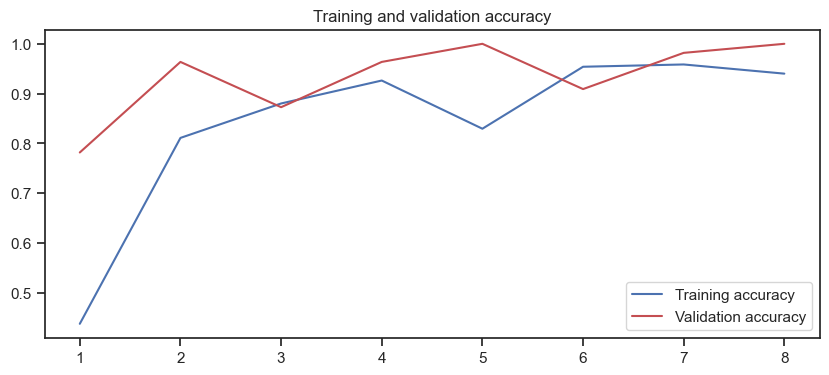

<Figure size 2000x827 with 0 Axes>

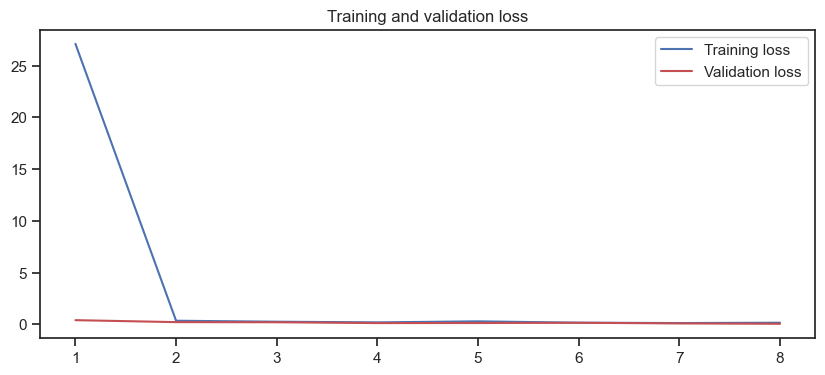

In [120]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 4))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend() 
plt.savefig('Training and validation accuracy.png',dpi=200)
plt.figure()

plt.figure(figsize=(10, 4))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [121]:
predictions = np.argmax(model.predict(X_test), axis=1)
actual = np.argmax(y_test, axis=1)

2/2 [==============================] - 0s 2ms/step


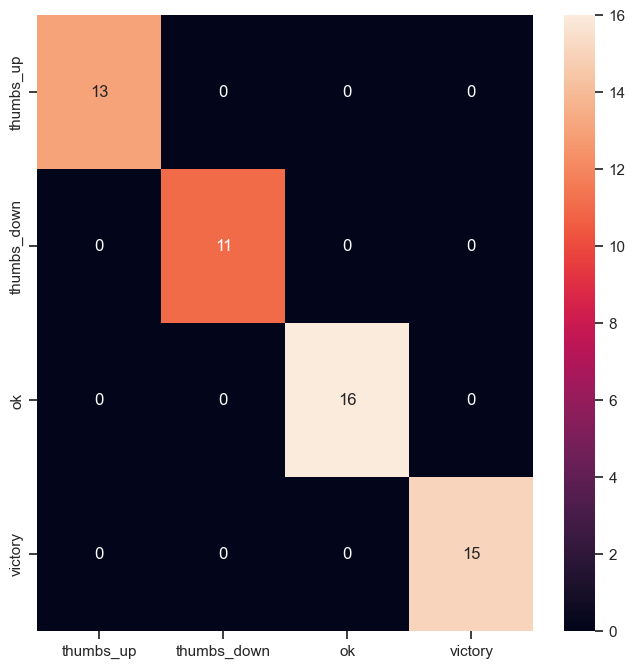

In [122]:
plt.figure(figsize=(8, 8))
cm = confusion_matrix(actual, predictions)
g = sns.heatmap(cm, annot=True, fmt='.0f')
g.set_xticklabels(class_mapping)
g.set_yticklabels(class_mapping)
plt.show()

In [123]:
y_test_temp = np.argmax(y_test, axis=1)
print(classification_report(y_test_temp, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        15

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55

